# QUESTION -1

In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# Markov Transition Matrix
A = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0.5, 0, 0, 0, 0, 0, 0, 0, 0.5, 0],
              [0, 0.5, 0, 0, 0, 0, 0.5, 0, 0,0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0.5, 0, 0, 0.5, 0, 0],
              [0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0],
              [0, 0.5,0, 0, 0.5, 0, 0, 0, 0, 1],
              [0.5, 0, 0, 0, 0, 0, 0.5, 0.5, 0, 0],
              [0, 0, 0, 0, 0, 0.5, 0, 0, 0.5, 0]])
A


array([[0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 1. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0.5, 0. ]])

In [3]:
# Initialize random vector
v = np.random.randn(10)
v /= np.linalg.norm(v)

# Copy vector for iteration
V = np.copy(v)
RQ = []


In [4]:
# Iterate to compute Rayleigh quotient
for k in range(300):
    w = A.dot(v)
    v = w / np.linalg.norm(w)
    RQ.append(np.dot(v, A.dot(v)))
    V = np.vstack((V, v))


In [5]:
# Final Rayleigh quotient and residual
print("Rayleigh quotient: ", RQ[-1])
print("Iterations taken: ", k)
print("Norm of A*v - RQ[-1]*v:", np.linalg.norm(A.dot(v) - RQ[-1] * v))


Rayleigh quotient:  0.9337956841912974
Iterations taken:  299
Norm of A*v - RQ[-1]*v: 3.588744299578216e-11


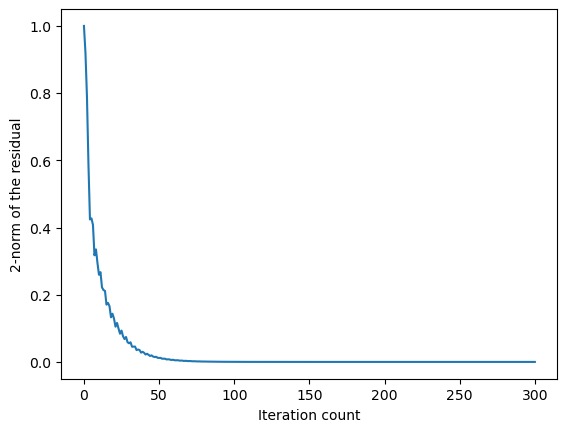

In [6]:
# Compute residual norm
residual_norm = np.linalg.norm(A.dot(V.T) - RQ[-1] * V.T, axis=0)

# Plot residual
plt.xlabel("Iteration count")
plt.ylabel("2-norm of the residual")
plt.plot(residual_norm)
plt.show()


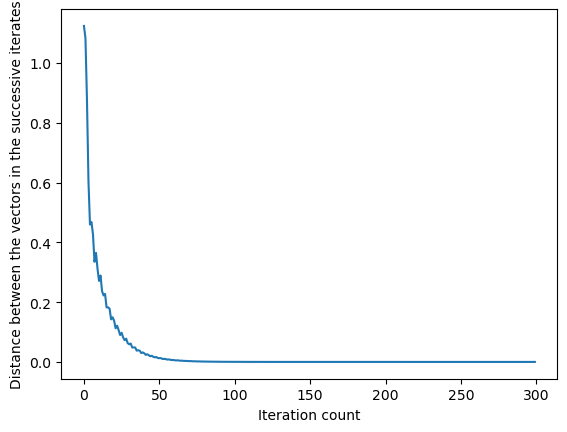

In [7]:
diff_norm = np.linalg.norm(V[:-1, :] - V[1:, :], axis=1)
plt.xlabel("Iteration count")
plt.ylabel("Distance between the vectors in the successive iterates")
plt.plot(diff_norm)


In [8]:
plt.xlabel("Iteration count")
plt.ylabel("Rayleigh quotient")
plt.plot(RQ)


In [9]:
page_rank = np.absolute(v)
page_rank /= np.sum(page_rank)

print("Highest page rank: ", np.argmax(np.absolute(v)))
print("Lowest page rank: ", np.argmax(-np.absolute(v)))



Highest page rank:  7
Lowest page rank:  3
